In [1]:
!nvidia-smi

Sun Mar  9 13:37:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   65C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**Step 01 # Install the Ultralytics Package**

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.6/922.6 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

**Step 02 # Import All the Requried Libraries**

In [3]:
from ultralytics import YOLO
from IPython.display import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**Step # 03 Download Dataset**

In [4]:
import gdown
# download the data from g drive

url = "https://drive.google.com/file/d/1v7E7SfGNoXdampdIciI18ukxVlPHvt_x/view?usp=sharing"
file_id = url.split("/")[-2]
print(file_id)

prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix+file_id, "sign_data.zip")


1v7E7SfGNoXdampdIciI18ukxVlPHvt_x


Downloading...
From (original): https://drive.google.com/uc?/export=download&id=1v7E7SfGNoXdampdIciI18ukxVlPHvt_x
From (redirected): https://drive.google.com/uc?%2Fexport=download&id=1v7E7SfGNoXdampdIciI18ukxVlPHvt_x&confirm=t&uuid=6115d77a-624d-466f-b0d7-34b7e4c6324a
To: /content/sign_data.zip
100%|██████████| 152M/152M [00:01<00:00, 116MB/s]


'sign_data.zip'

In [5]:
!unzip sign_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/labels/018_jpg.rf.eefc1a2708b5f6f1b450737185293e2b.txt  
  inflating: train/labels/019_jpg.rf.102b862923e1df309d116652eee8957a.txt  
  inflating: train/labels/019_jpg.rf.13c4a95462316dc039b7875e14f85a7e.txt  
  inflating: train/labels/019_jpg.rf.195b4bc2b13e77694bc032a57fe41e84.txt  
  inflating: train/labels/019_jpg.rf.1dfb5fddc230416c3b079e7569ed416e.txt  
  inflating: train/labels/019_jpg.rf.4f9104176b5209580dd3a76a209f83f8.txt  
  inflating: train/labels/019_jpg.rf.51161ef33564dbe0a0f5e174a0ab7430.txt  
  inflating: train/labels/019_jpg.rf.5d1a9745dc84de87d99e6a88d7c56cf4.txt  
  inflating: train/labels/019_jpg.rf.83ff3095e374f91d5a9353262742b0fb.txt  
  inflating: train/labels/019_jpg.rf.b31324956787a87acaada8c9a2fe0e47.txt  
  inflating: train/labels/019_jpg.rf.d26797ce8b9e443a33789e5702c45c7c.txt  
  inflating: train/labels/019_jpg.rf.e064c7a39aa51d31ecac83edc08a530c.txt  
  inflating: train/labels/020_jpg.rf.

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [6]:
!yolo train model=yolo11s.pt data=/content/data.yaml epochs=10 batch=16 imgsz=640


100% 18.4M/18.4M [00:00<00:00, 111MB/s]
Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

**Step # 05 Examine Training Results**

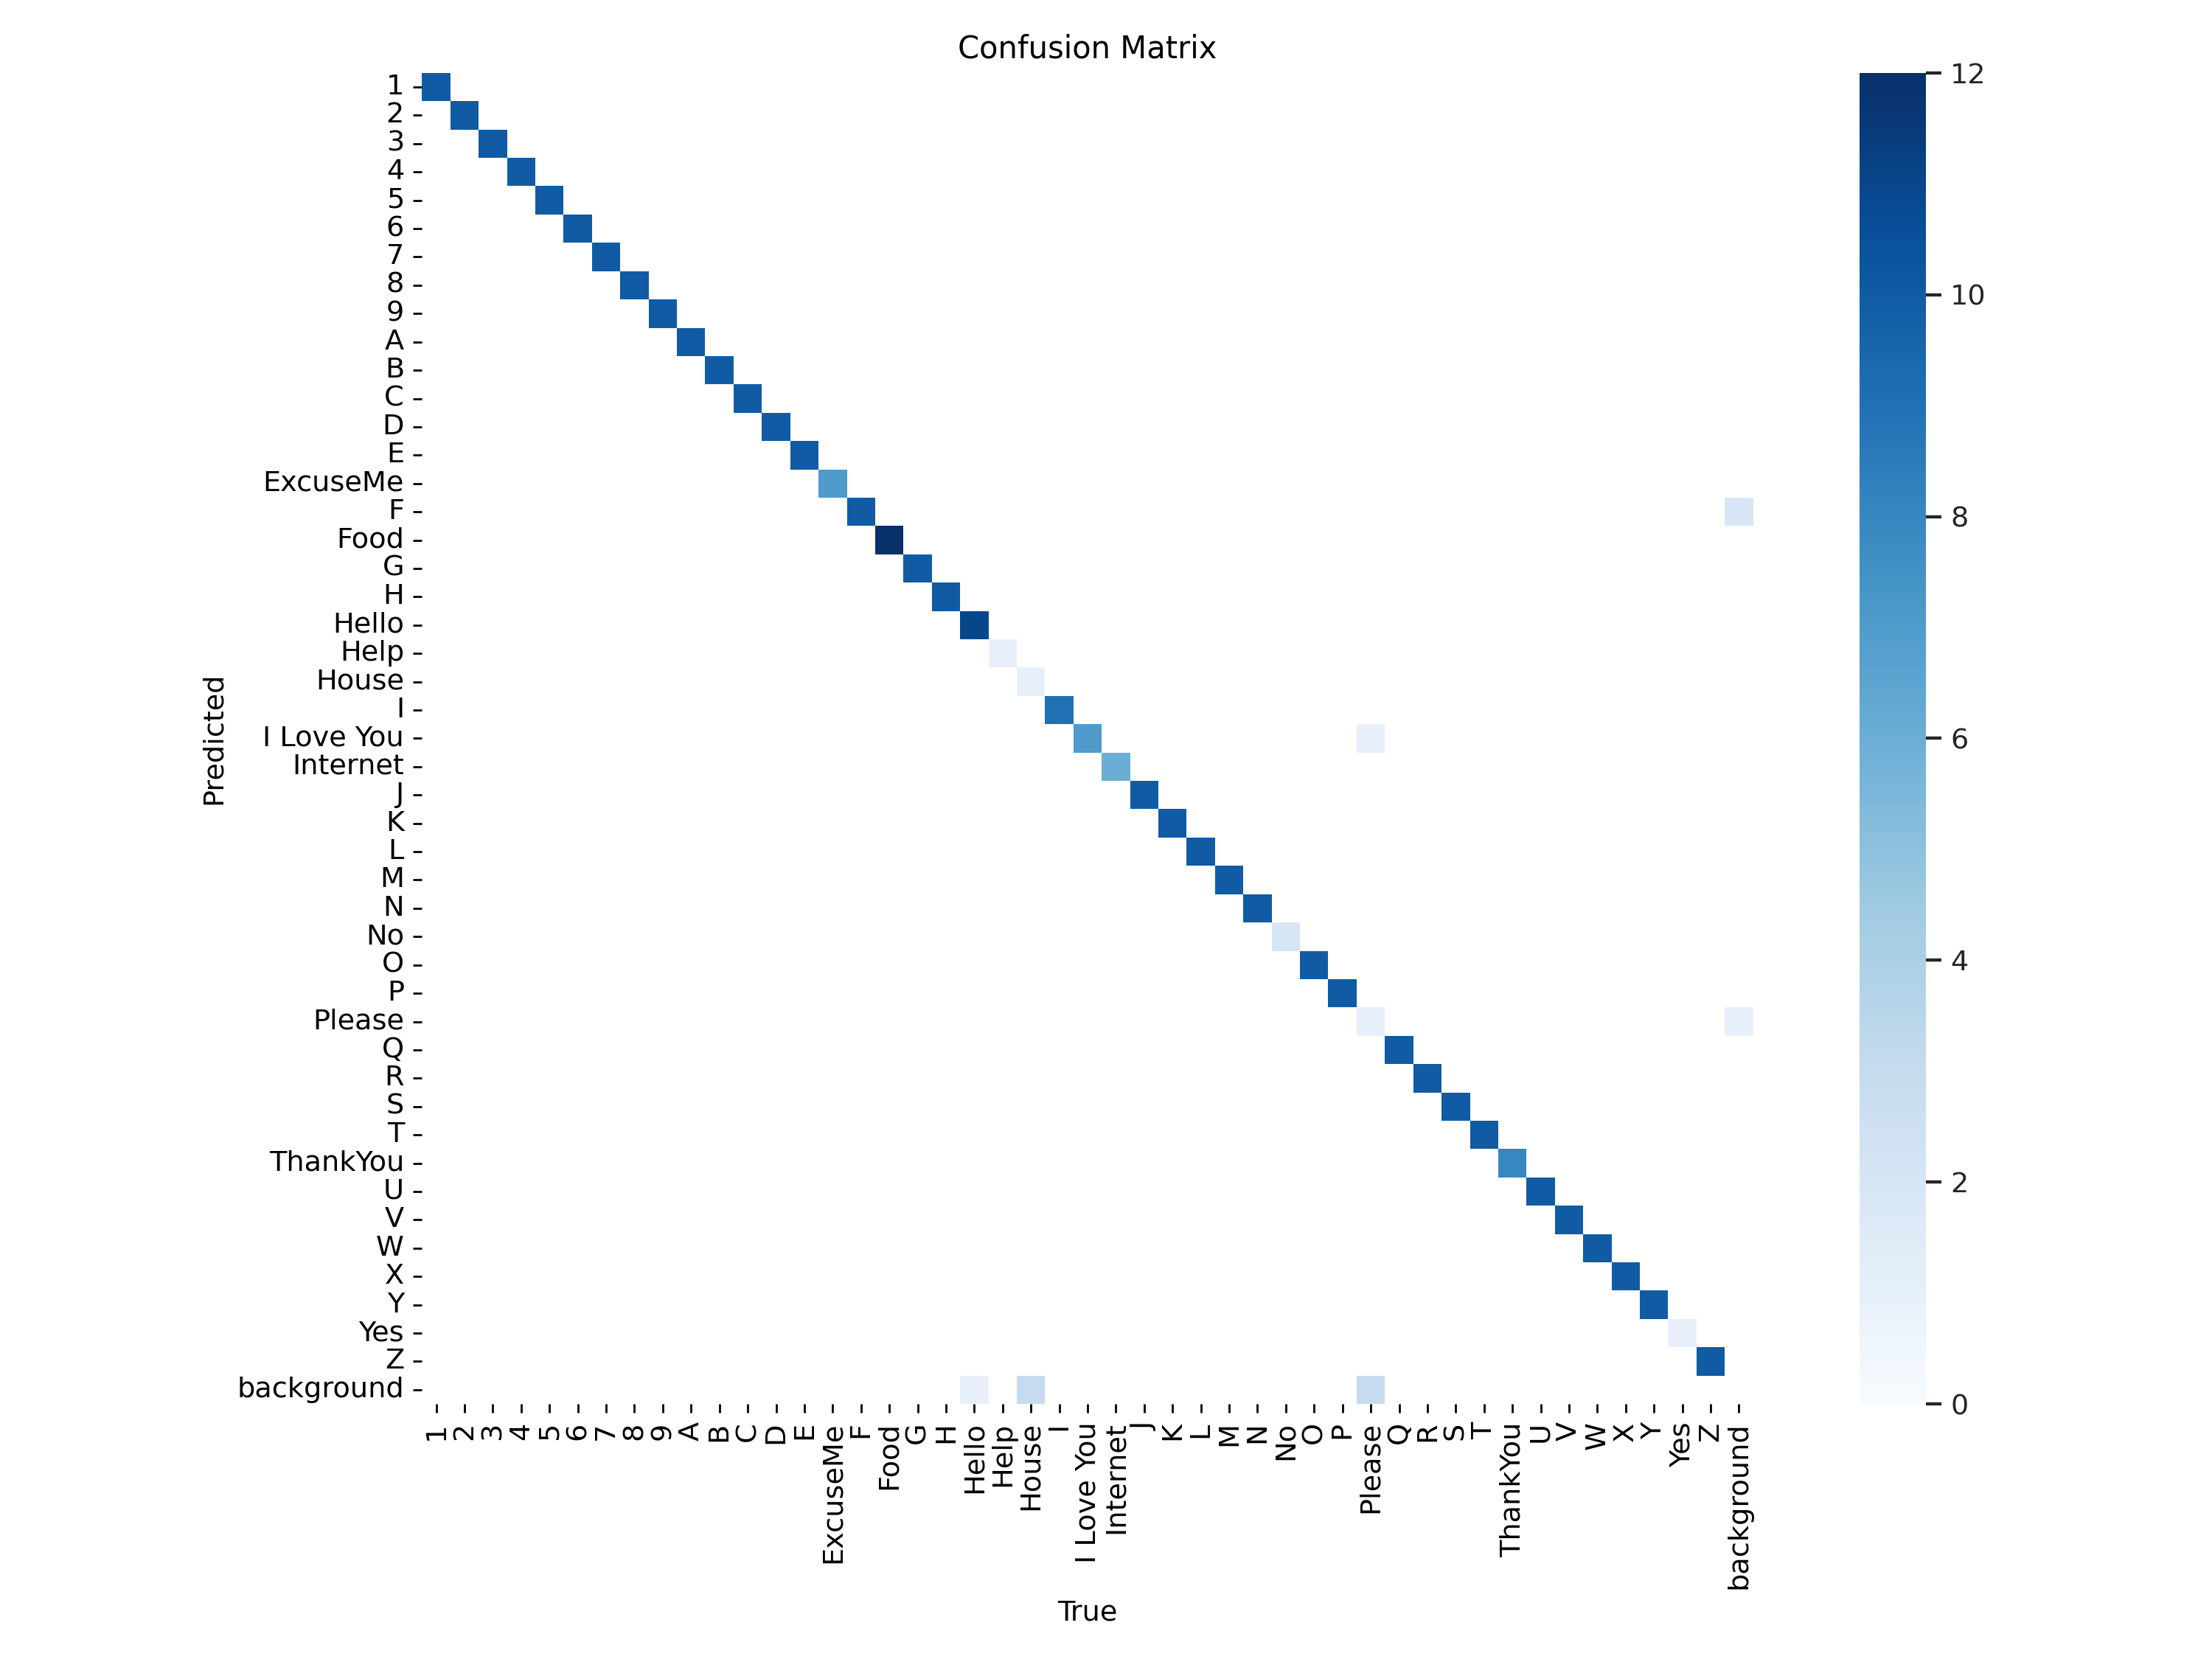

In [9]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

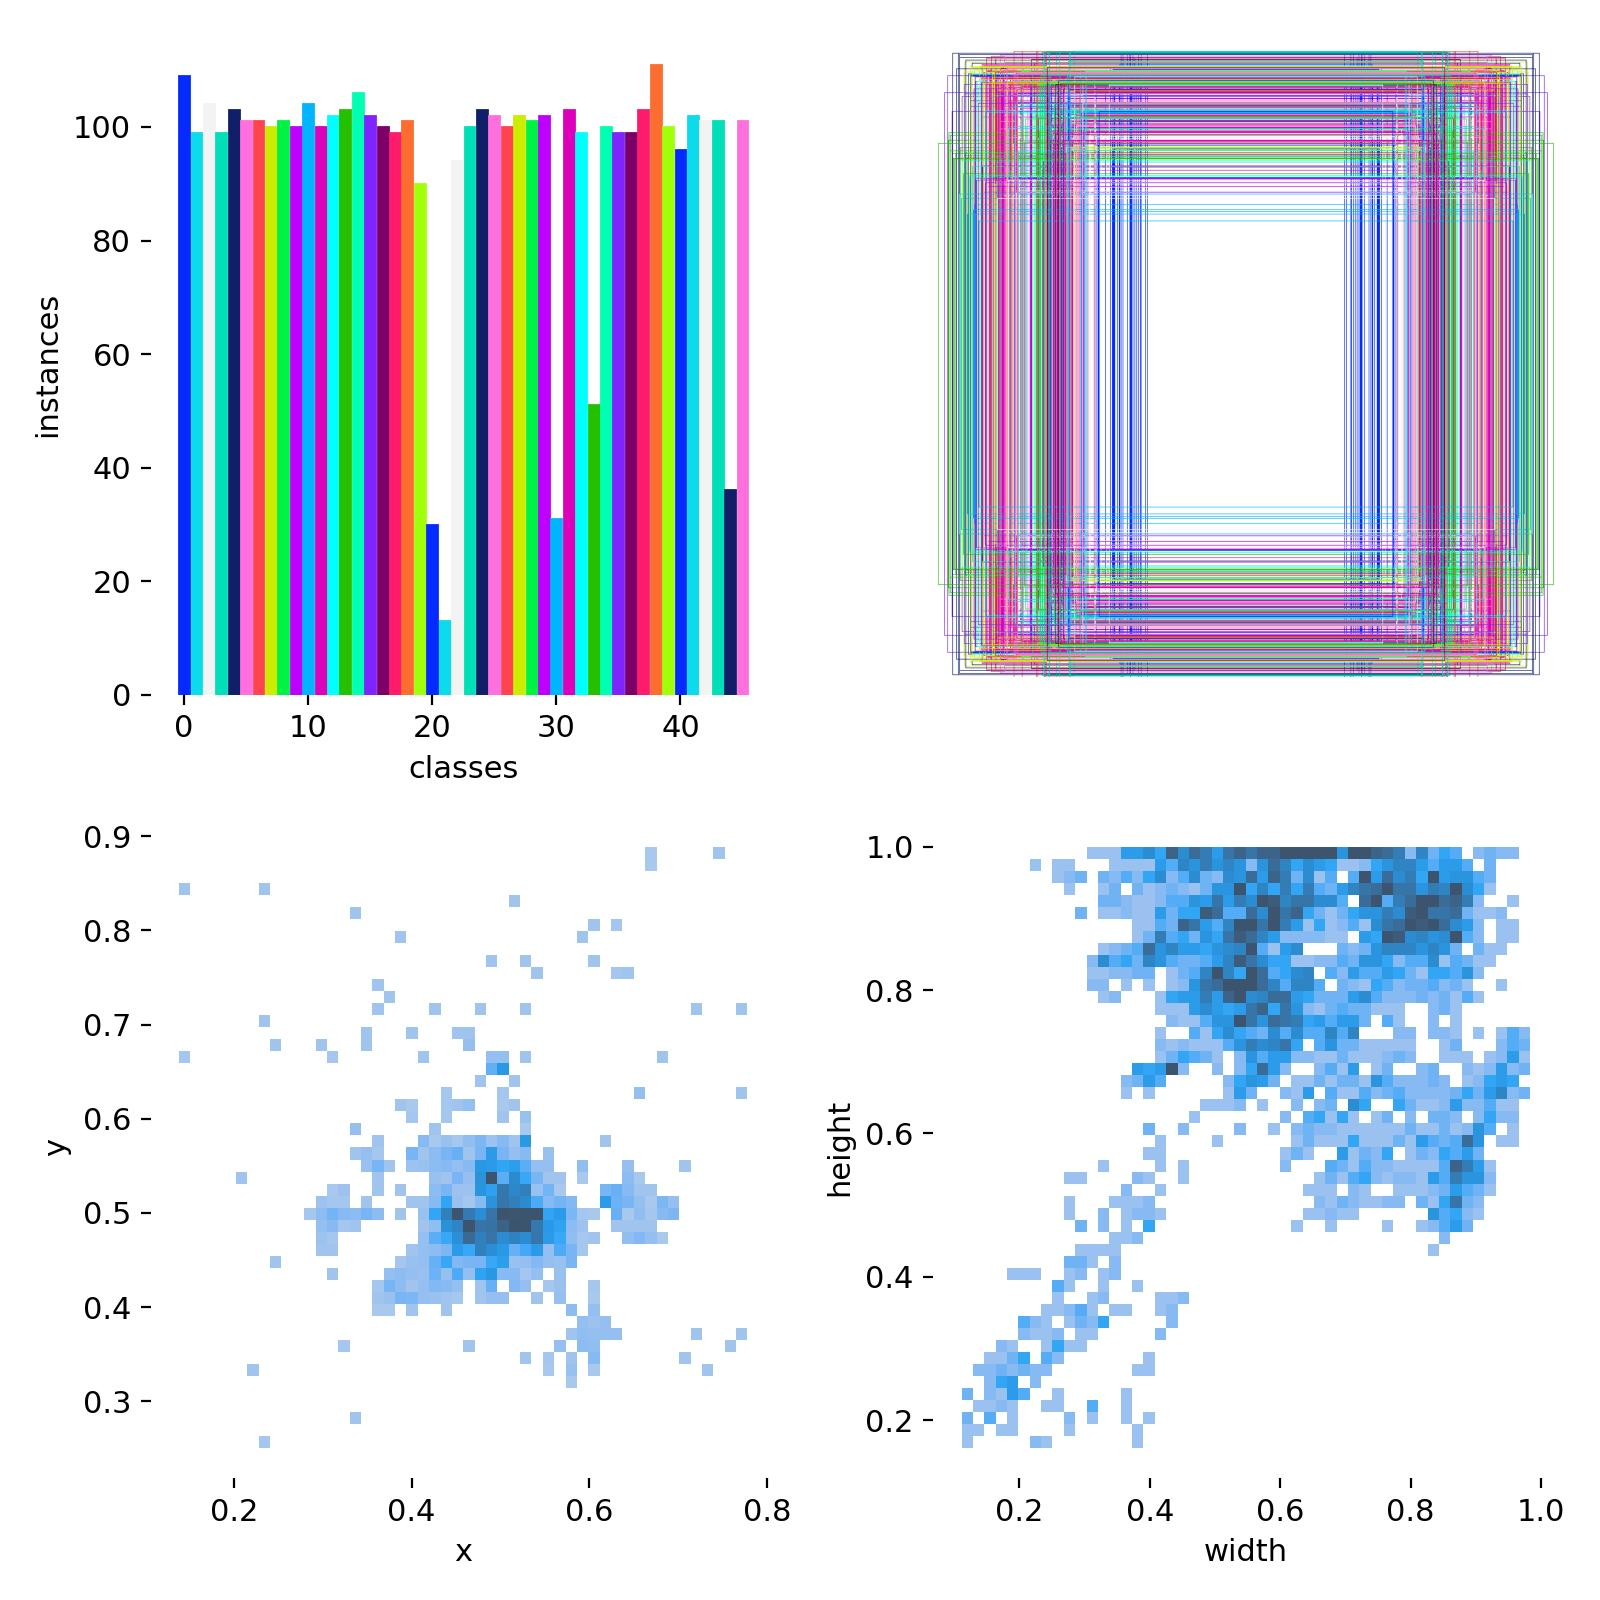

In [10]:
Image("/content/runs/detect/train/labels.jpg", width=600)

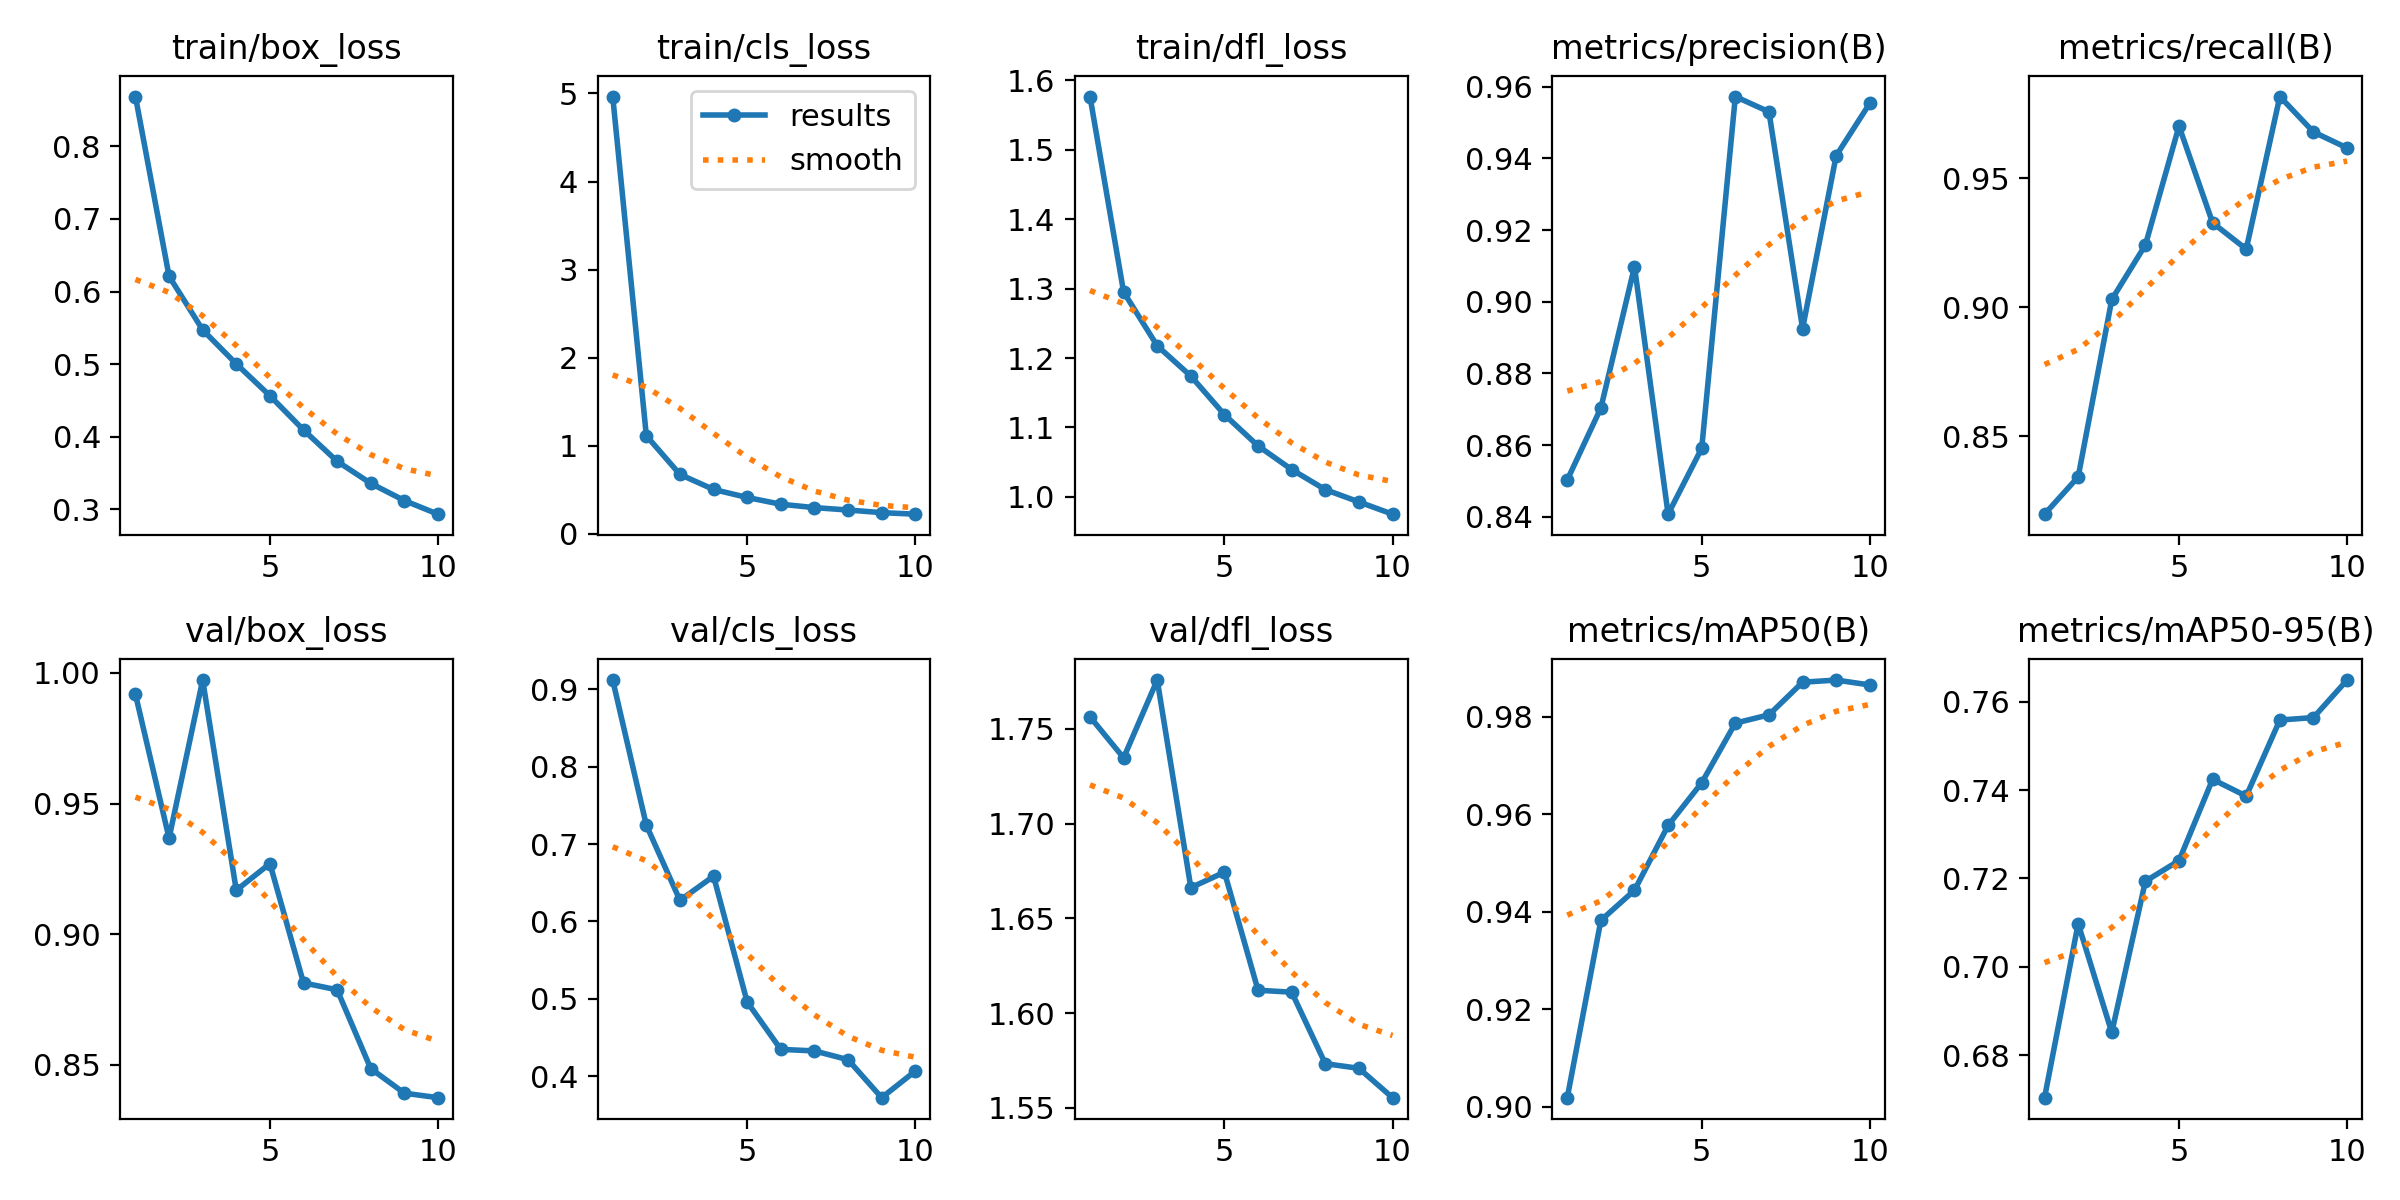

In [11]:
Image("/content/runs/detect/train/results.png", width=600)

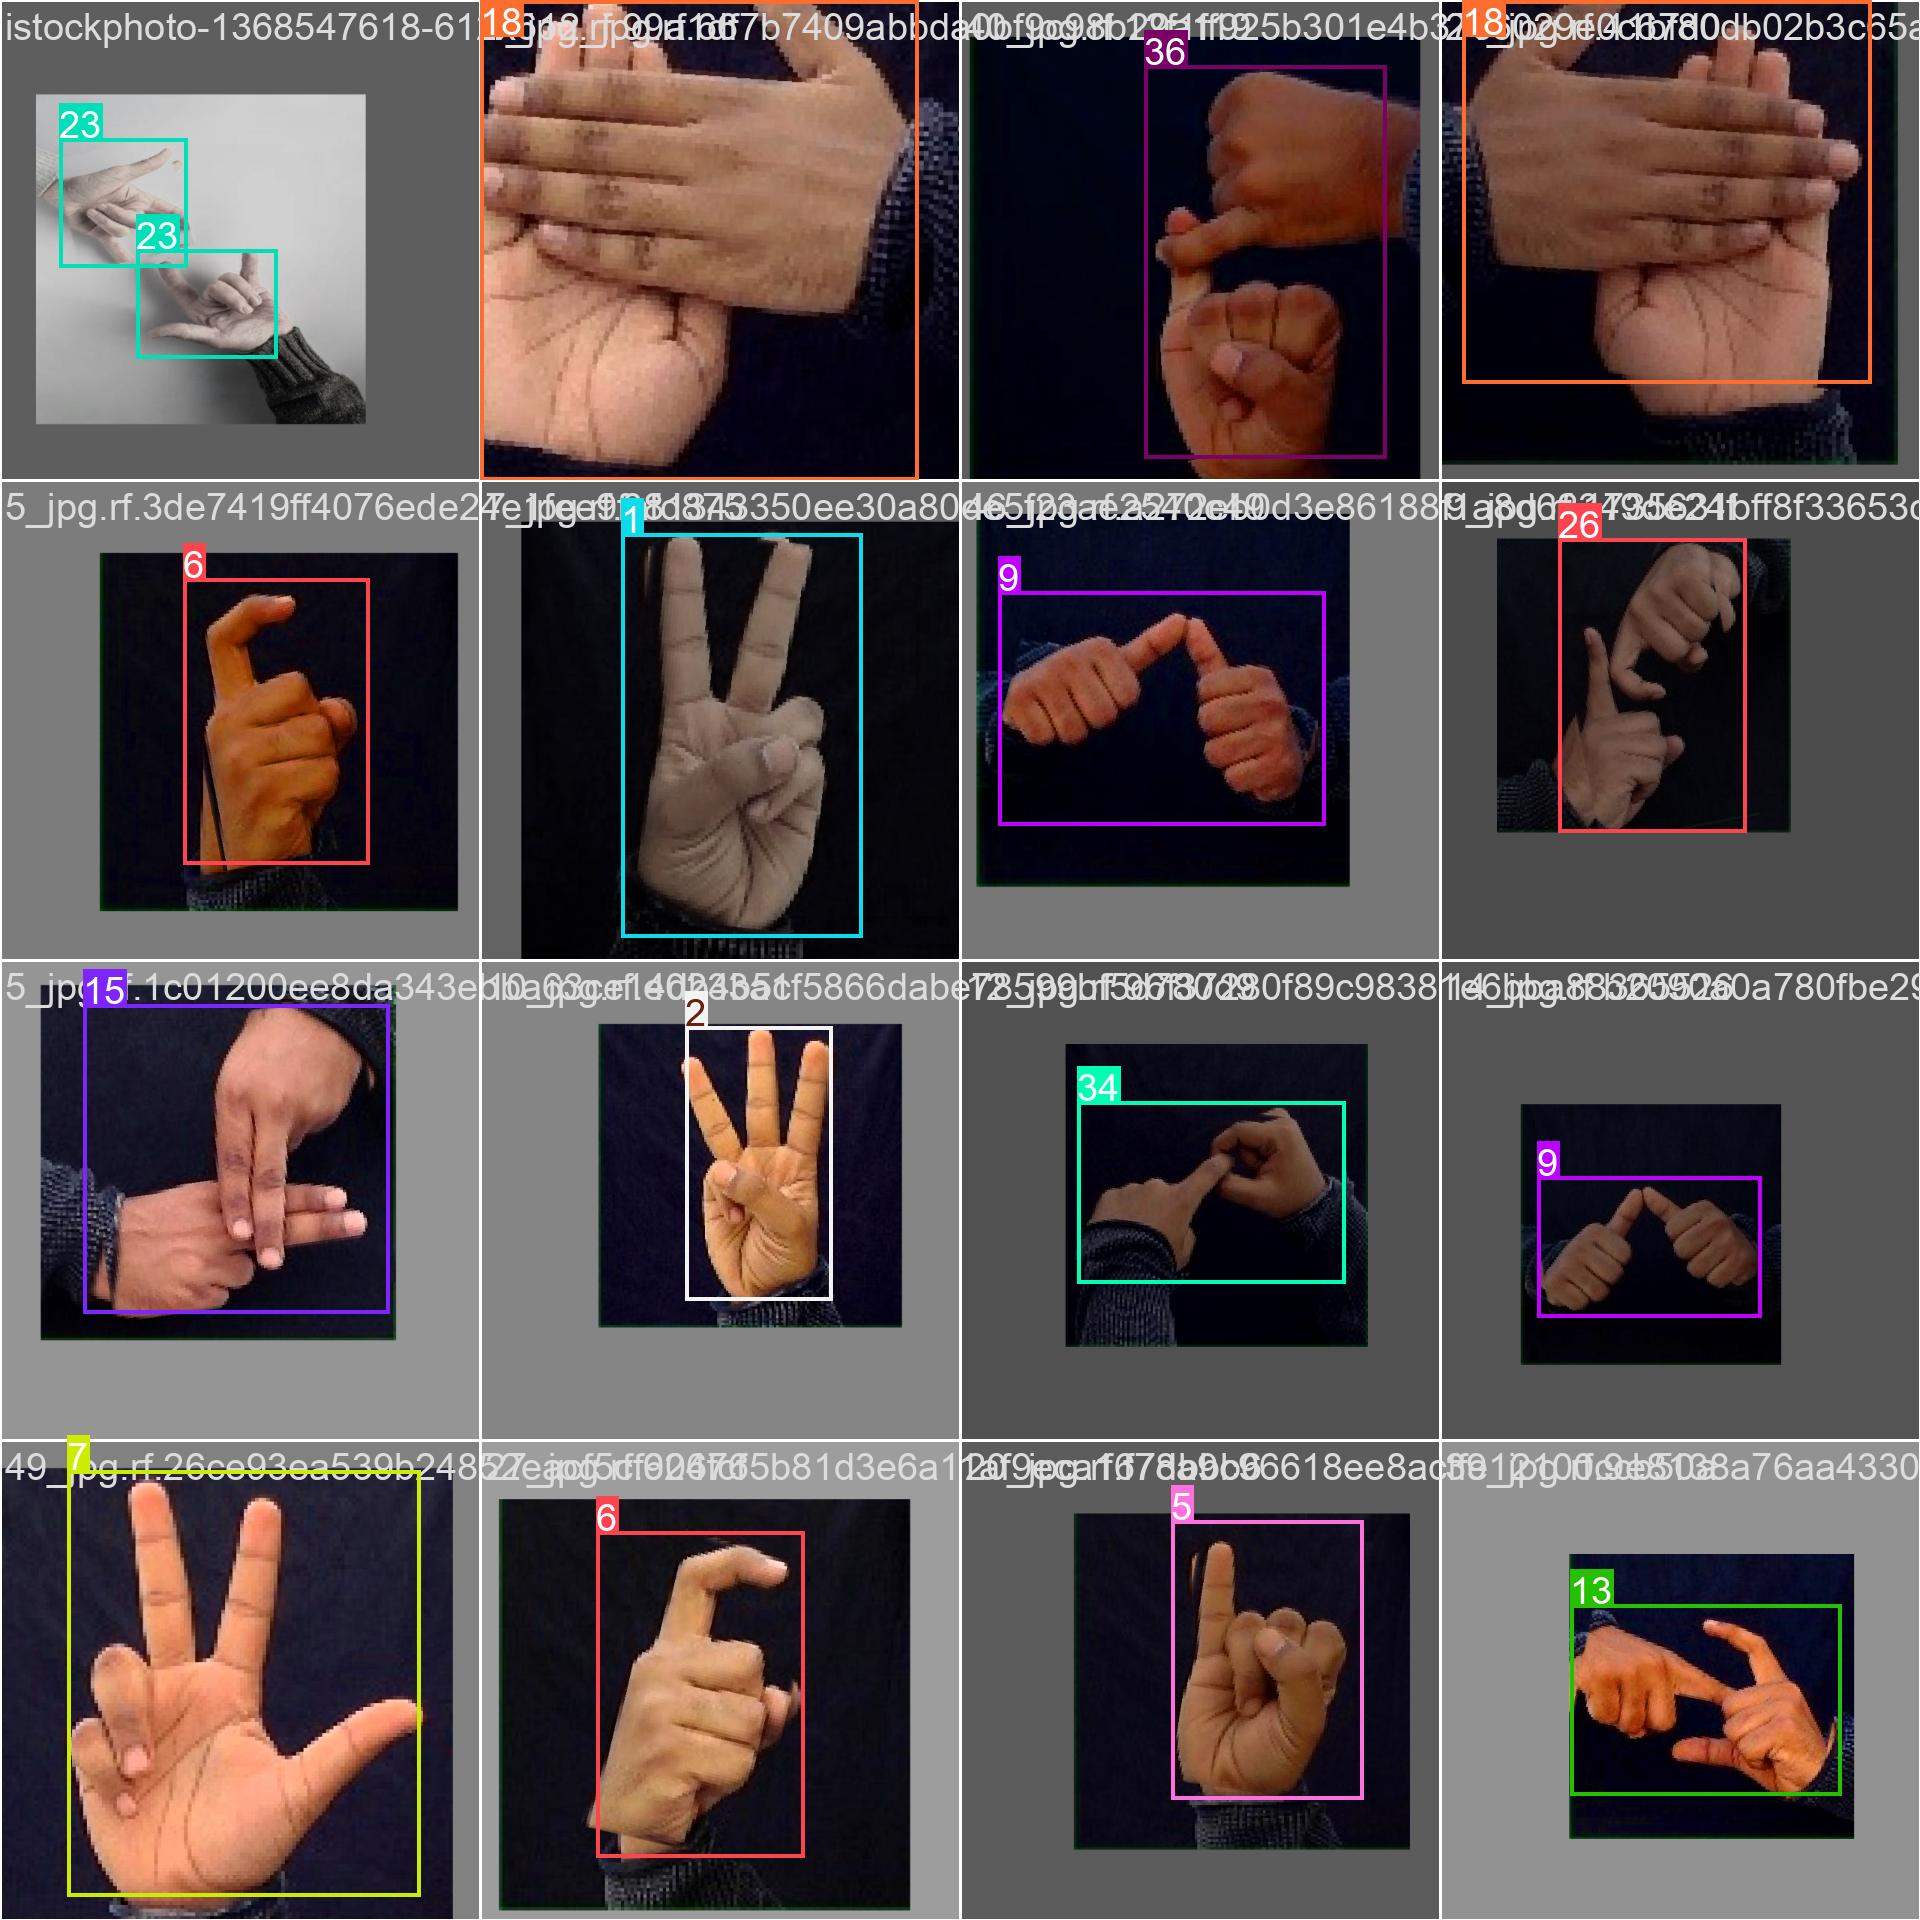

In [12]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

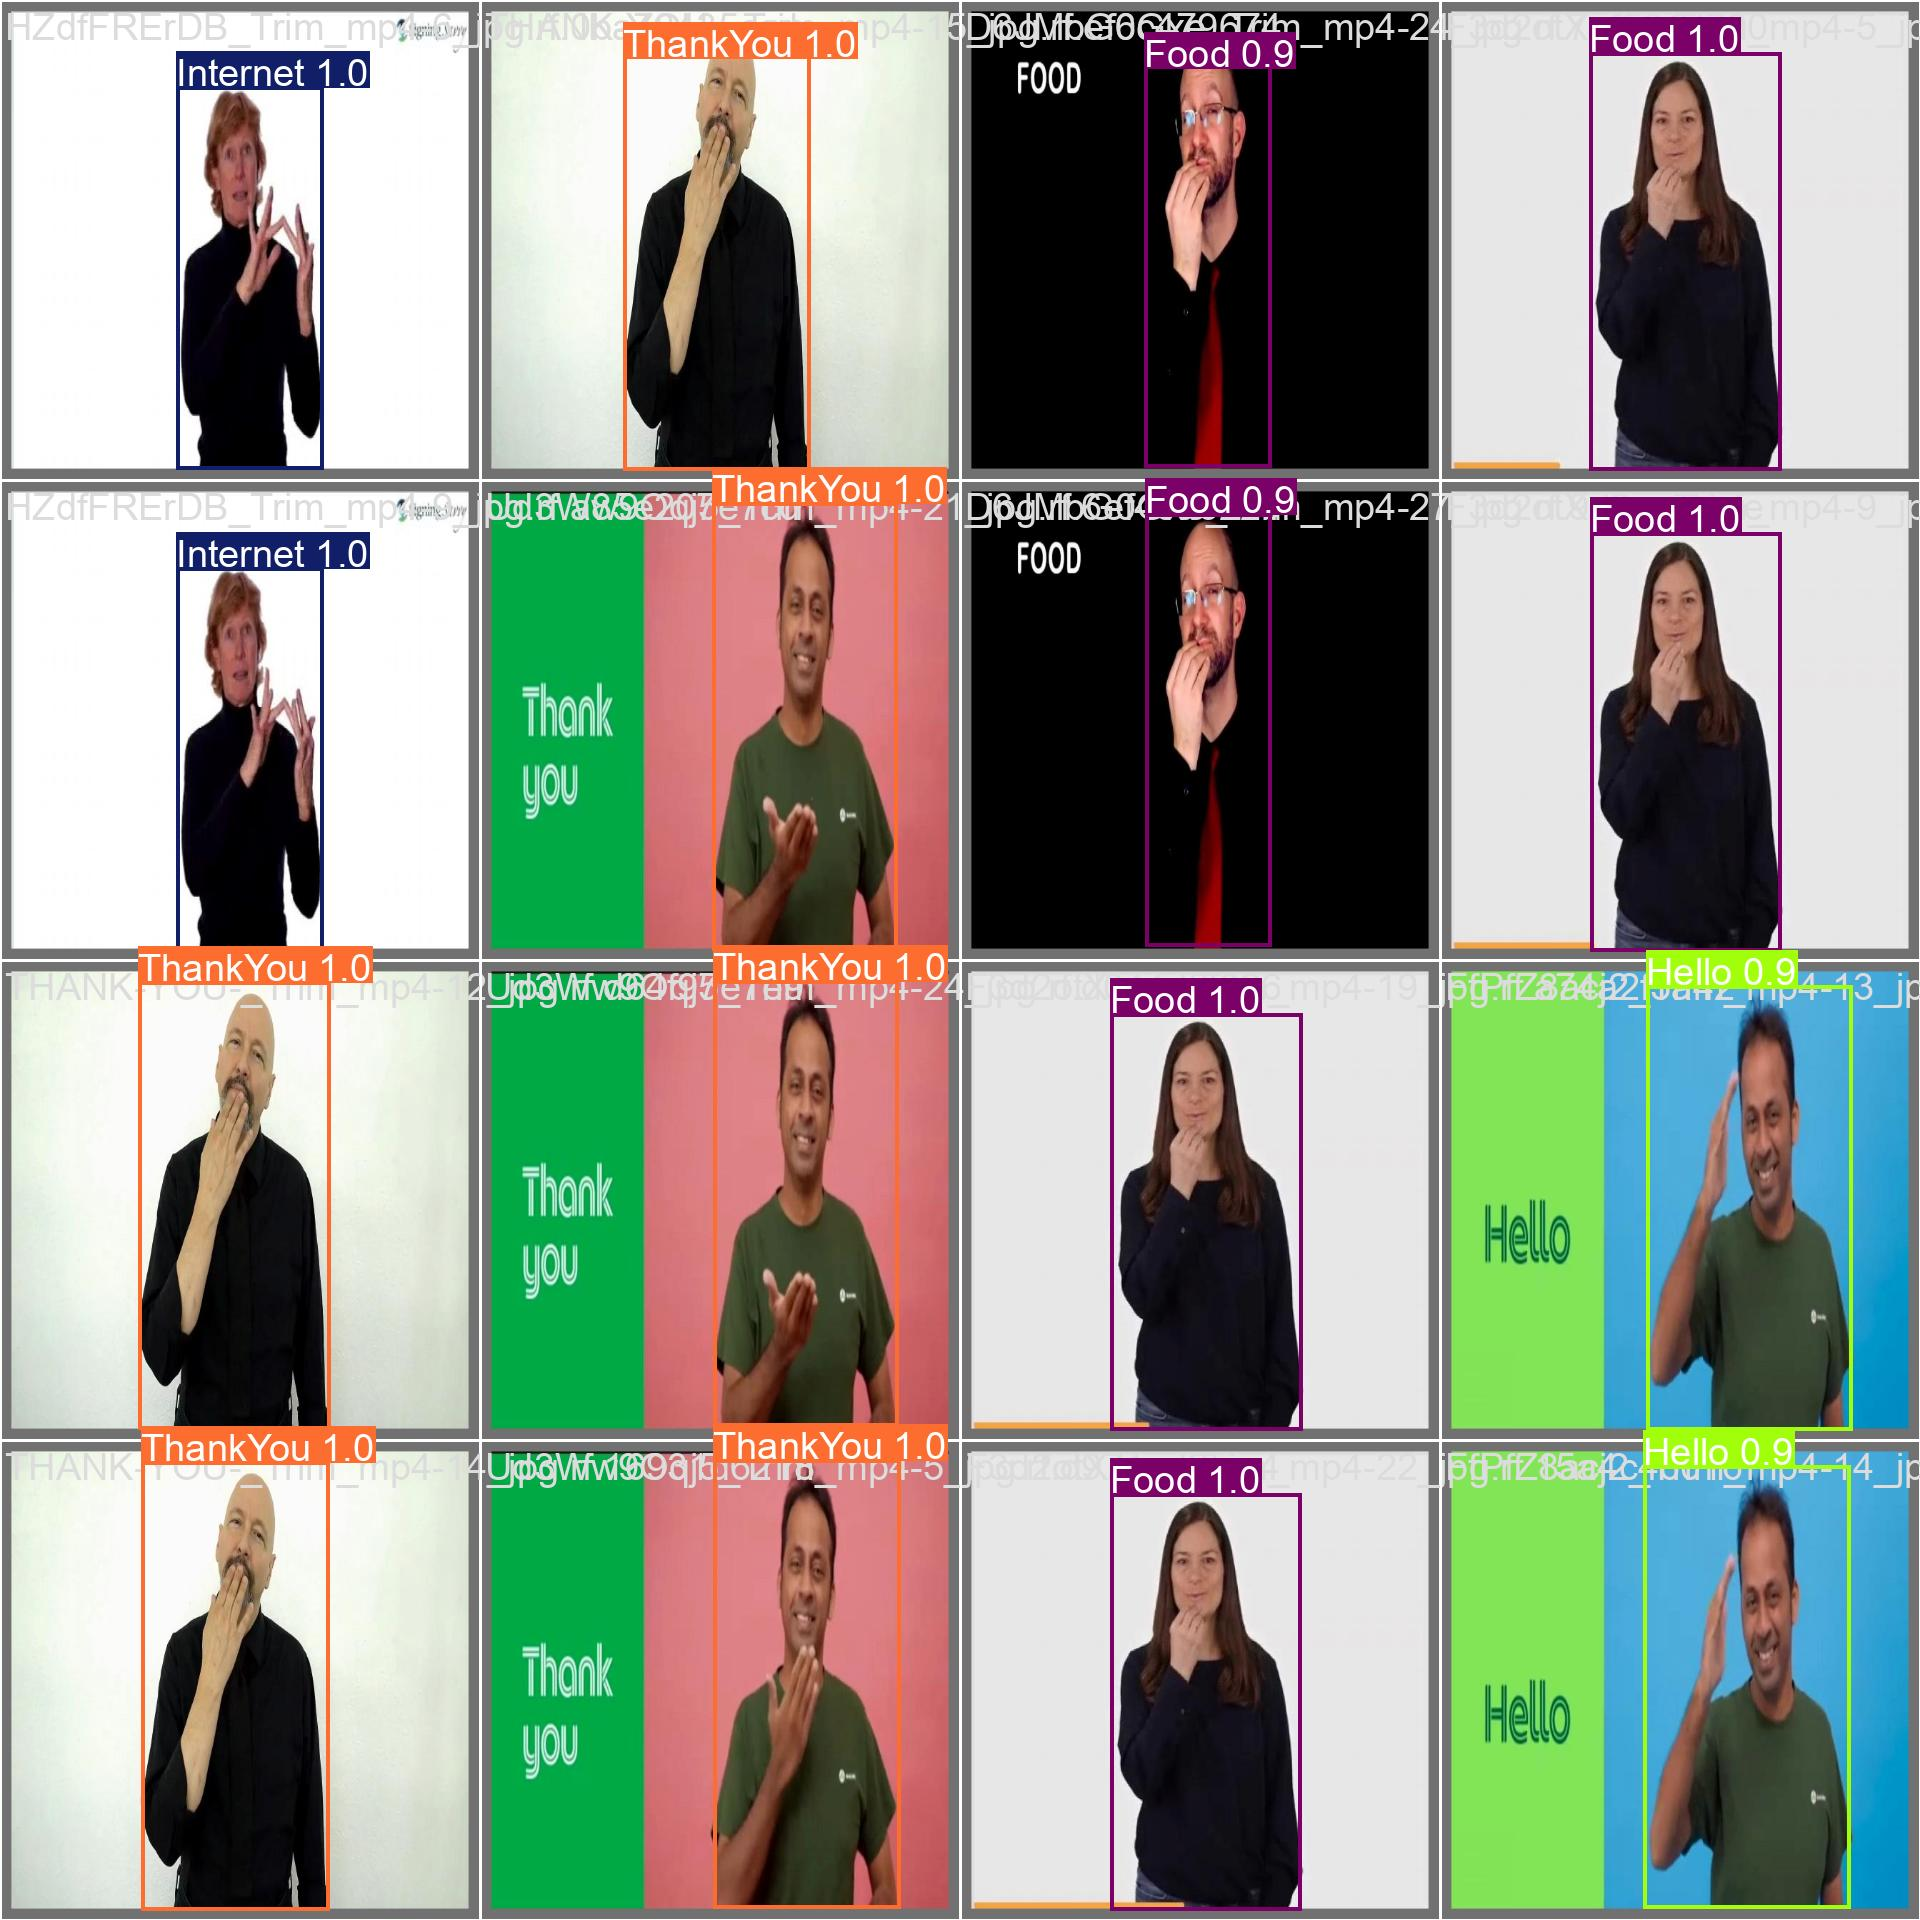

In [13]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

**Step # 08 Inference with Custom Model on Images**

In [14]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/test/images" save=True

Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,430,602 parameters, 0 gradients, 21.4 GFLOPs

image 1/222 /content/test/images/006_jpg.rf.362877a451de39815ba8112422df0097.jpg: 640x640 1 I, 15.8ms
image 2/222 /content/test/images/011_jpg.rf.4eec364b2830a716efd5212822653abb.jpg: 640x640 1 O, 15.8ms
image 3/222 /content/test/images/012_jpg.rf.14b486c6ae715d6d8c15d83049a2c6da.jpg: 640x640 1 V, 15.7ms
image 4/222 /content/test/images/013_jpg.rf.a4db748ae870f12b42939cc2fa9faf0d.jpg: 640x640 1 V, 15.7ms
image 5/222 /content/test/images/014_jpg.rf.66a9ce59c863c742334f64ae11a3c418.jpg: 640x640 1 I, 15.7ms
image 6/222 /content/test/images/014_jpg.rf.ce5eba340b1179cf15d878a2d48529fe.jpg: 640x640 1 O, 15.7ms
image 7/222 /content/test/images/015_jpg.rf.28ea2decbff6e0577534e694a7fcbc2a.jpg: 640x640 1 I, 15.2ms
image 8/222 /content/test/images/016_jpg.rf.e4405034f2e83e69c094d5f3b7b6a2aa.jpg: 640x640 1 O, 15.1ms
image 9/222 /cont

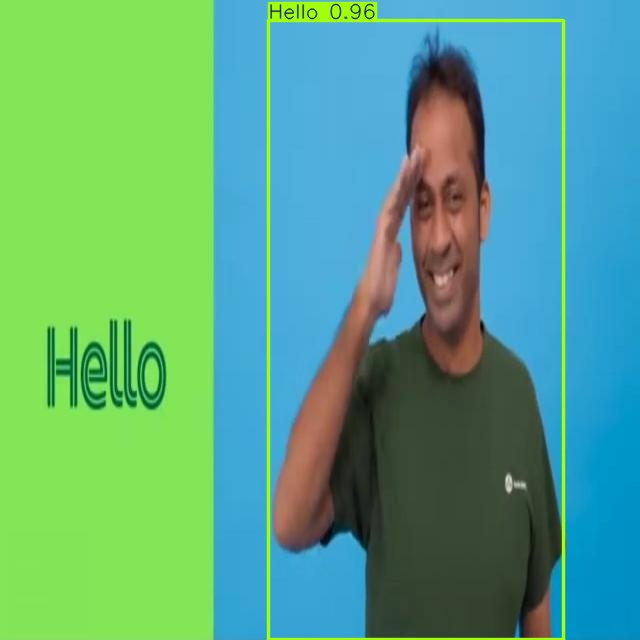

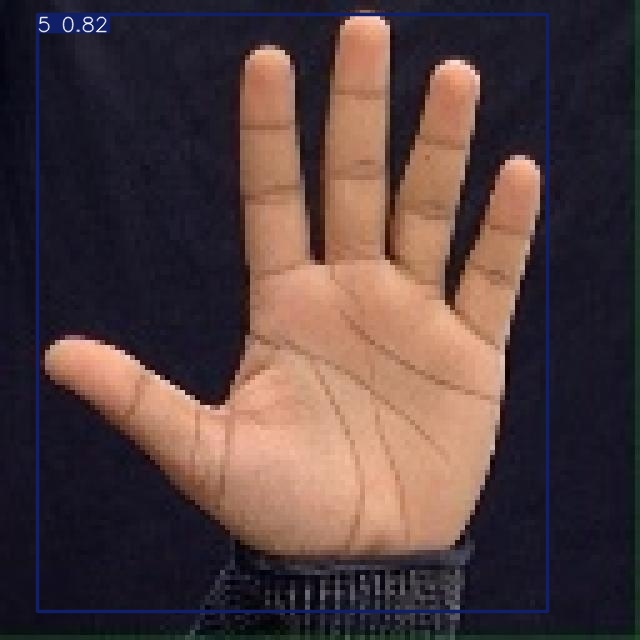

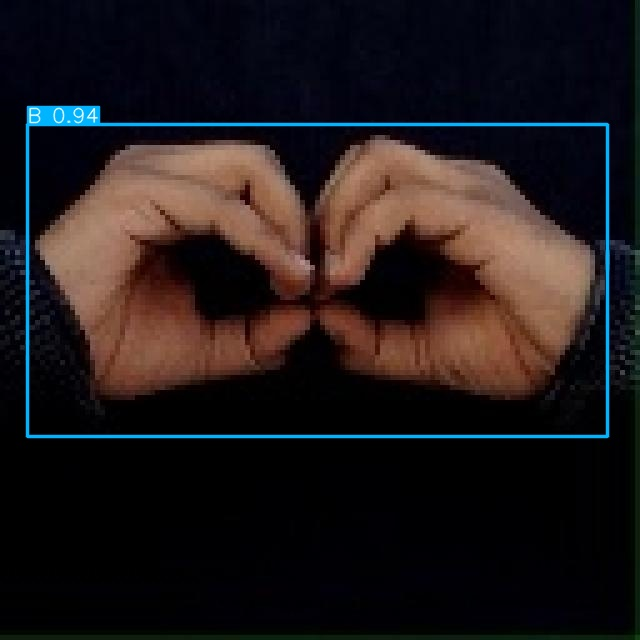

In [15]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [17]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/train/images/11_jpg.rf.2e1cd21c1f1e8f7c33f123b654ea40a8.jpg" save=True

Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,430,602 parameters, 0 gradients, 21.4 GFLOPs

image 1/1 /content/train/images/11_jpg.rf.2e1cd21c1f1e8f7c33f123b654ea40a8.jpg: 640x640 1 D, 15.7ms
Speed: 3.1ms preprocess, 15.7ms inference, 154.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


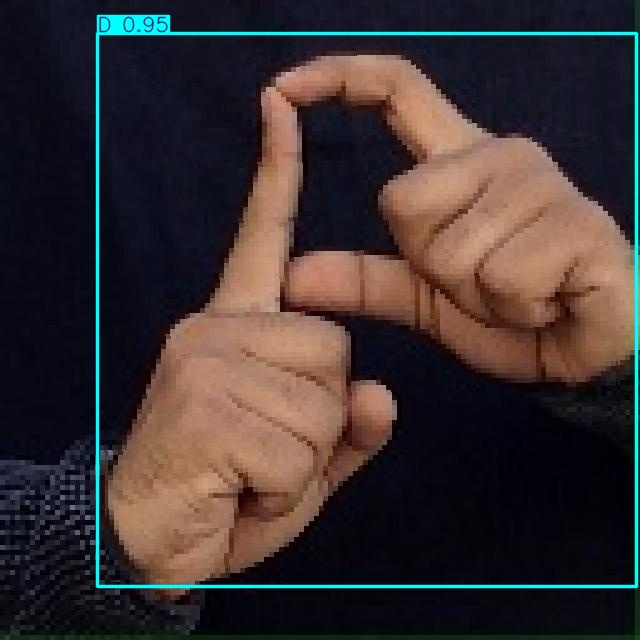

In [18]:
Image("/content/runs/detect/predict2/11_jpg.rf.2e1cd21c1f1e8f7c33f123b654ea40a8.jpg", width=600)